# HW3: Data Mining

Author: Quentin Ducoulombier  
Student id: 312551811

## Import

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import seaborn as sns


## Load Dataset

In [102]:
# Load the datasets
train_data = pd.read_csv('./data/training.csv')
test_data = pd.read_csv('./data/test_X.csv')

# Display the first few rows of the training data
print("Training Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Training Data:
  lettr  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0     B      4      8      6     6      5      9      7      4      6     10   
1     B      1      0      1     0      0      7      7      6      4      7   
2     B      4      8      6     6      8      8      8      4      3      6   
3     B      4      7      6     5      5      8      6      5      6      9   
4     B      9     14      7     8      5      6      8      5      7     10   

   x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0      5      6      2      8      6     10  
1      6      7      1      8      5      9  
2      7      7      6     11      8      9  
3      6      7      3      8      7      9  
4      6      8      6      6      7      9  

Test Data:
   x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  x2ybr  \
0      3     11      4     8      2      1     13      5      4     12     10   
1      4     10      5     7      3      5     10     

## Data Preprocessing

In [103]:
# Separating features and target variable from training data
X_train = train_data.drop('lettr', axis=1)
y_train = train_data['lettr']

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(test_data)

# Splitting the training data for validation
# For final submit in KNN comment this line
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


## Model Training and Evaluation

In [104]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


### KNN

k=1 - Validation Accuracy: 96.07142857142857%
k=2 - Validation Accuracy: 93.21428571428572%
k=3 - Validation Accuracy: 95.71428571428572%
k=4 - Validation Accuracy: 95.47619047619048%
k=5 - Validation Accuracy: 95.47619047619048%
k=6 - Validation Accuracy: 95.35714285714286%
k=7 - Validation Accuracy: 95.47619047619048%
k=8 - Validation Accuracy: 95.71428571428572%
k=9 - Validation Accuracy: 95.5952380952381%
k=10 - Validation Accuracy: 95.5952380952381%
k=11 - Validation Accuracy: 95.83333333333334%
k=12 - Validation Accuracy: 95.47619047619048%
k=13 - Validation Accuracy: 95.35714285714286%
k=14 - Validation Accuracy: 95.0%
k=15 - Validation Accuracy: 95.23809523809523%
k=16 - Validation Accuracy: 94.16666666666667%
k=17 - Validation Accuracy: 94.64285714285714%
k=18 - Validation Accuracy: 94.28571428571428%
k=19 - Validation Accuracy: 94.4047619047619%
k=20 - Validation Accuracy: 93.92857142857143%


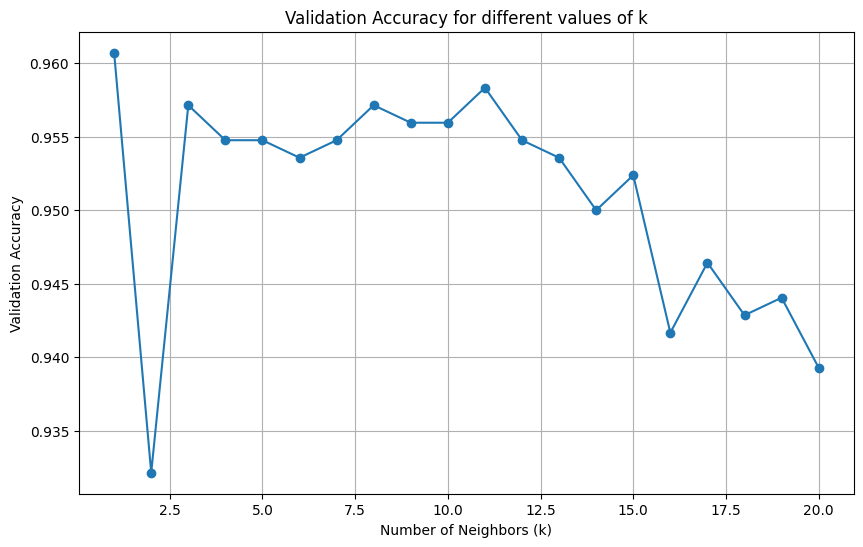

Best k: 1
Validation Accuracy: 96.07142857142857%
Confusion Matrix:
[[162   0   0   1   0   0]
 [  3 138   0   0   1   2]
 [  1   2 102   0   5   0]
 [  1   0   0 136   0   0]
 [  1   3  10   0 141   1]
 [  0   1   1   0   0 128]]
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       163
           E       0.96      0.96      0.96       144
           K       0.90      0.93      0.91       110
           N       0.99      0.99      0.99       137
           X       0.96      0.90      0.93       156
           Z       0.98      0.98      0.98       130

    accuracy                           0.96       840
   macro avg       0.96      0.96      0.96       840
weighted avg       0.96      0.96      0.96       840



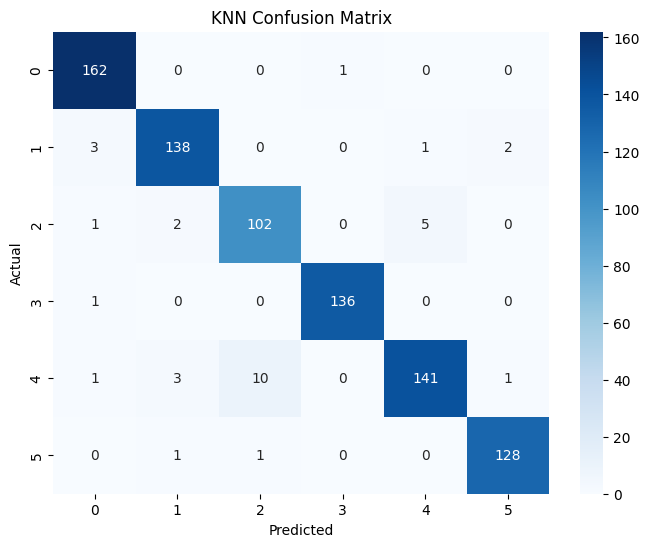

In [105]:
# Testing with multiple values of k
k_values = range(1, 21)
val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred_knn = knn.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred_knn)
    val_accuracies.append(val_accuracy)
    print(f"k={k} - Validation Accuracy: {val_accuracy * 100}%")

# Plotting the validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, val_accuracies, marker='o')
plt.title('Validation Accuracy for different values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

# Choose the best k
best_k = k_values[np.argmax(val_accuracies)]
print(f"Best k: {best_k}")

# Train final model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predict on validation data
y_val_pred_knn = knn.predict(X_val)

# Evaluate the model
val_accuracy_knn = accuracy_score(y_val, y_val_pred_knn)
print(f"Validation Accuracy: {val_accuracy_knn * 100}%")
# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_val, y_val_pred_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

# Classification Report
class_report_knn = classification_report(y_val, y_val_pred_knn)
print("Classification Report:")
print(class_report_knn)


# Plotting Confusion Matrix for KNN
plot_confusion_matrix(conf_matrix_knn, "KNN Confusion Matrix")


### SVM

In [106]:
# Using One-Class SVM for anomaly detection
from sklearn.metrics import roc_auc_score


oc_svm = OneClassSVM(kernel='rbf', gamma='auto')
oc_svm.fit(X_train)

# Predict on validation data using decision function for float values
y_val_pred_svm = oc_svm.decision_function(X_val)

# Evaluate the model using a threshold (you can choose an appropriate threshold)
threshold = np.percentile(y_val_pred_svm, 5)
y_val_pred_svm_binary = (y_val_pred_svm < threshold).astype(int)

# Mapping numerical predictions back to the original string labels for evaluation
y_val_binary = np.where(y_val.isin(train_data['lettr'].unique()), 0, 1)  # Convert y_val to binary
    
# Evaluate the model
val_accuracy_svm = accuracy_score(y_val_binary, y_val_pred_svm_binary)
print(f"SVM Validation Accuracy: {val_accuracy_svm * 100}%")

# Classification Report
class_report_svm = classification_report(y_val_binary, y_val_pred_svm_binary)
print("SVM Classification Report:")
print(class_report_svm)

SVM Validation Accuracy: 95.0%
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       840
           1       0.00      0.00      0.00         0

    accuracy                           0.95       840
   macro avg       0.50      0.47      0.49       840
weighted avg       1.00      0.95      0.97       840



/home/quentinducoulombier/anaconda3/envs/py3122/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/quentinducoulombier/anaconda3/envs/py3122/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/quentinducoulombier/anaconda3/envs/py3122/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

### Autoencoder

In [107]:
input_dim = X_train.shape[1]
encoding_dim = 14  # Number of neurons in the hidden layer

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="tanh")(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_val, X_val))


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.0316 - val_loss: 1.0107
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9874 - val_loss: 0.9754
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9559 - val_loss: 0.9515
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9347 - val_loss: 0.9346
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9213 - val_loss: 0.9212
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9052 - val_loss: 0.9104
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8988 - val_loss: 0.9011
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8907 - val_loss: 0.8922
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8796 - val_loss: 0.8829
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8688 - val_loss: 0.8736
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8602 - val_loss: 0.8654
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8641 - val_l

In [108]:
# Predict on validation data
val_predictions = autoencoder.predict(X_val)
mse = np.mean(np.power(X_val - val_predictions, 2), axis=1)
threshold = np.percentile(mse, 95)
y_val_pred_ae = (mse > threshold).astype(int)


# Convert y_val to binary
y_val_binary = np.where(y_val.isin(train_data['lettr'].unique()), 0, 1)  # Convert y_val to binary

# Evaluate the model
val_accuracy_ae = accuracy_score(y_val_binary, y_val_pred_ae)
print(f"Autoencoder Validation Accuracy: {val_accuracy_ae * 100}%")

# Classification Report
class_report_ae = classification_report(y_val_binary, y_val_pred_ae)
print("Autoencoder Classification Report:")
print(class_report_ae)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Autoencoder Validation Accuracy: 95.0%
Autoencoder Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       840
           1       0.00      0.00      0.00         0

    accuracy                           0.95       840
   macro avg       0.50      0.47      0.49       840
weighted avg       1.00      0.95      0.97       840



/home/quentinducoulombier/anaconda3/envs/py3122/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/quentinducoulombier/anaconda3/envs/py3122/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/quentinducoulombier/anaconda3/envs/py3122/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

## Comparing Validation Accuracies

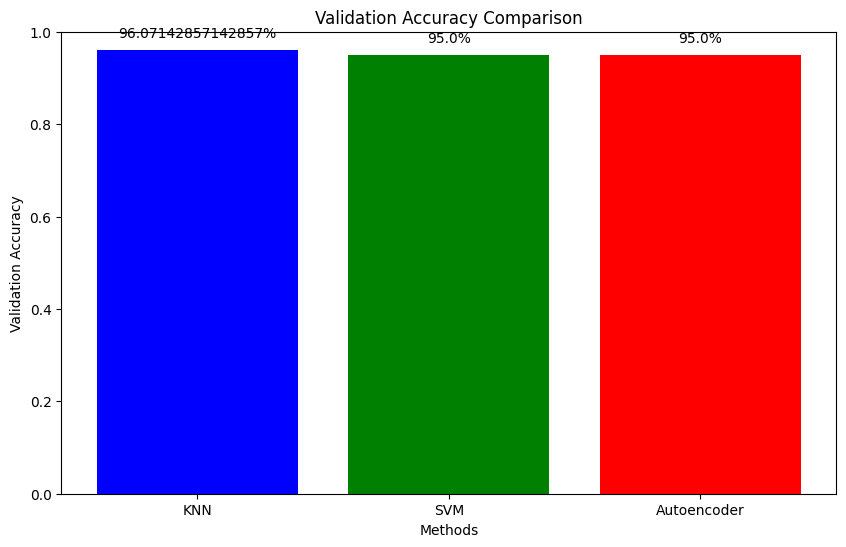

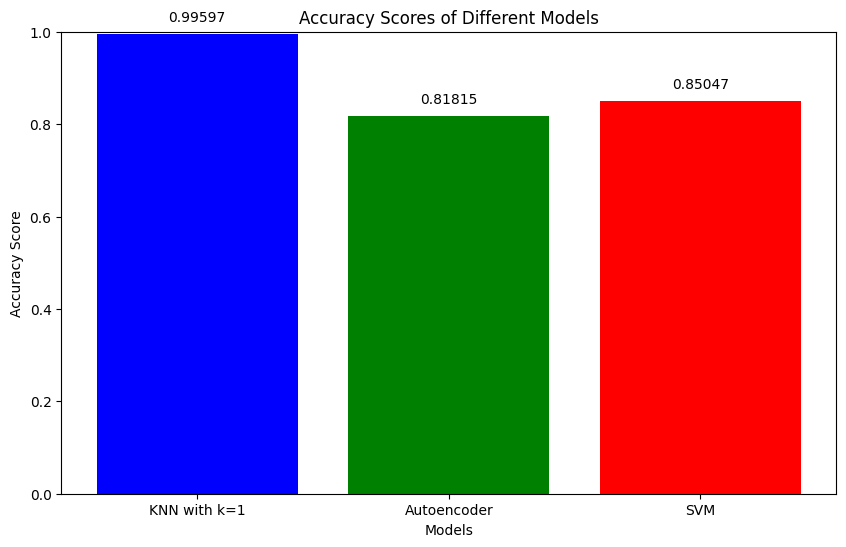

In [109]:
methods = ['KNN', 'SVM', 'Autoencoder']
val_accuracies = [val_accuracy_knn, val_accuracy_svm, val_accuracy_ae]

plt.figure(figsize=(10, 6))
plt.bar(methods, val_accuracies, color=['blue', 'green', 'red'])
plt.title('Validation Accuracy Comparison')
plt.xlabel('Methods')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(val_accuracies):
    plt.text(i, v + 0.02, f"{v * 100}%", ha='center', va='bottom')
plt.show()


# Known accuracy scores import from kaggle
accuracy_scores = {
    "KNN with k=1": 0.99597,
    "Autoencoder": 0.81815,
    "SVM": 0.85047
}

# Extract the model names and their corresponding accuracy scores
models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['blue', 'green', 'red'])
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f"{score:.5f}", ha='center', va='bottom')
plt.show()

## Predicting Anomalies on Test Data

In [110]:
# KNN
test_distances, _ = knn.kneighbors(X_test)
anomaly_scores_knn = test_distances.mean(axis=1)

# SVM
test_pred_svm = oc_svm.decision_function(X_test)
anomaly_scores_svm = -test_pred_svm  # Use negative decision function scores for anomalies

# Autoencoder
test_predictions_ae = autoencoder.predict(X_test)
mse_test = np.mean(np.power(X_test - test_predictions_ae, 2), axis=1)
anomaly_scores_ae = mse_test

Length of test_data: 1000
Length of anomaly_scores_svm: 1000
Length of test_data after calculation: 1000
Length of anomaly_scores_svm after calculation: 1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


## Create submission file

In [111]:
# KNN submission
submission_knn = pd.DataFrame({'id': np.arange(len(test_data)), 'outliers': anomaly_scores_knn})
submission_knn.to_csv('submission_knn.csv', index=False)

# SVM submission
submission_svm = pd.DataFrame({'id': np.arange(len(test_data)), 'outliers': anomaly_scores_svm})
submission_svm.to_csv('submission_svm.csv', index=False)

# Autoencoder submission
submission_ae = pd.DataFrame({'id': np.arange(len(test_data)), 'outliers': anomaly_scores_ae})
submission_ae.to_csv('submission_ae.csv', index=False)